# **Classification I Lab: Working with classifiers**

Author: Vanessa Gómez Verdejo (http://vanessa.webs.tsc.uc3m.es/)

Updated: 07/02/2017 (working with sklearn 0.18.1)

In this lab session we are going to deep in our knowledge about classifiers by managing most well-known classification algorithms. Besides, we are going to review some useful techniques, such as the cross validation process, which will allow us to adjust the free parameters of the classifier. For this lab session, we will work with a real multiclass data set: Iris. 

#### ** During this lab we will cover: **
#### * Part 1: K-Nearest Neighbours (K-NN)*
#### * Part 2: Support Vector Machines (SVMs) with different kernel funcions*
#### * Part 3: Other linear classifiers*


As in previous lab session, to implement the different approaches we will base in [Scikit-Learn](http://scikit-learn.org/stable/) python toolbox.

### ** Part 0: Load and prepare the data **

The [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) consists of 150 patterns corresponding to 3 different types of irises: Setosa, Versicolour, and Virginica. Each pattern contains the sepal and petal lengths and widths. Despite having four input features, for display purposes, we are going to start working with the first two features: sepal length and sepal width. 

The below code let you:
* create training and testing partitions with the 60% and 40% of the original data
* normalize the data to zero mean and unitary standard deviation 


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the random generator seed to compare results
np.random.seed(0)

# Load Iris data set
iris = datasets.load_iris()
X = iris.data[:,[ 1, 3]]  # we only take the first two features.
Y = iris.target

# Create data partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.6)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ** Part 1: K-NN**

A K-NN approach classifies each new data searching its K nearest neighbors (among the training data) and assigning the majority class among these neighbors. As expected, its performance depends on the number of neighbors (K) used.

#### ** 1.1: Training a K-NN classifier**
To start to work, let's analyze for different values of K the K-NN performance, both over training and test sets. Use the [KNeighborsClassifier()](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) method to complete the below code.

In [3]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

K_max=20
rang_K = np.arange(1, K_max+1)
vect_tr=[]
vect_test=[]

for n_neighbors in rang_K:
    # Create a KNN classifier, train it and compute training and error accuracies.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,Y_train)
    acc_tr = clf.score(X_train,Y_train)
    acc_test = clf.score(X_test, Y_test)
    
    # Saving accuracies in a list 
    vect_tr.append(acc_tr)
    vect_test.append(acc_test)

    print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))
    

For K = 1, train accuracy is 100.00% and test accuracy is 88.89%
For K = 2, train accuracy is 96.67% and test accuracy is 86.67%
For K = 3, train accuracy is 95.00% and test accuracy is 94.44%
For K = 4, train accuracy is 93.33% and test accuracy is 94.44%
For K = 5, train accuracy is 95.00% and test accuracy is 94.44%
For K = 6, train accuracy is 95.00% and test accuracy is 94.44%
For K = 7, train accuracy is 95.00% and test accuracy is 94.44%
For K = 8, train accuracy is 95.00% and test accuracy is 94.44%
For K = 9, train accuracy is 95.00% and test accuracy is 95.56%
For K = 10, train accuracy is 95.00% and test accuracy is 93.33%
For K = 11, train accuracy is 95.00% and test accuracy is 92.22%
For K = 12, train accuracy is 93.33% and test accuracy is 91.11%
For K = 13, train accuracy is 95.00% and test accuracy is 91.11%
For K = 14, train accuracy is 95.00% and test accuracy is 91.11%
For K = 15, train accuracy is 95.00% and test accuracy is 91.11%
For K = 16, train accuracy is 95.

In [4]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(np.sum(np.array(vect_tr)),2), 18.90, 'incorrect result: Training error of K-NN is uncorrect')
Test.assertEquals(np.round(np.sum(np.array(vect_test)),2), 18.36, 'incorrect result: Test error of K-NN is uncorrect')


1 test passed.
1 test passed.


Next code, let you plot the evolution of above computed train and test accuracies.

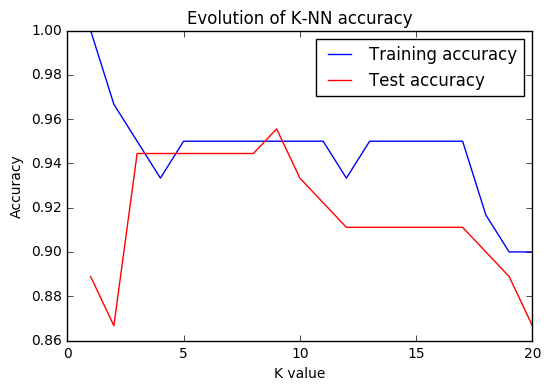

In [5]:
#Plot acc vs K
import matplotlib.pyplot as plt

plt.figure()
plt.plot(rang_K,vect_tr,'b', label='Training accuracy')
plt.plot(rang_K,vect_test,'r', label='Test accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy')
plt.show()

This figure points out the necessity of selecting the adequate value of K. And, as expected, using the training error for such selection would provide a poor generalization.

#### ** 1.2: Selecting the number of neighbors of a K-NN classifier**

Therefore, next step will consist of applying a cross validation (CV) process to select the optimum value of K. You can use the [GridSearchCV( )](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) function to implement it. 

In [11]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

# Parameters
K_max = 20
rang_K = np.arange(1, K_max+1)
nfold = 10
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
tuned_parameters = [{'n_neighbors': rang_K}]


# Cross validation proccess 
clf_base = neighbors.KNeighborsClassifier( )
# Define the classfifier with the CV process (use GridSearchCV here!!!)
clf = GridSearchCV(clf_base, tuned_parameters, cv=nfold)
# Train it (this executes the CV)
clf.fit(X_train, Y_train)

print 'CV process sucessfully finished'

CV process sucessfully finished


After running the CV process, the classifier object  contains the information of the CV process (next cell explore the parameter ".grid\_scores\_" to obtain this information).

Cross validation results:
For K = 1, validation accuracy is 91.67 (+/-4.095)%
For K = 2, validation accuracy is 91.67 (+/-4.095)%
For K = 3, validation accuracy is 93.33 (+/-4.009)%
For K = 4, validation accuracy is 93.33 (+/-4.009)%
For K = 5, validation accuracy is 93.33 (+/-4.009)%
For K = 6, validation accuracy is 95.00 (+/-3.740)%
For K = 7, validation accuracy is 95.00 (+/-3.740)%
For K = 8, validation accuracy is 95.00 (+/-3.740)%
For K = 9, validation accuracy is 95.00 (+/-3.740)%
For K = 10, validation accuracy is 93.33 (+/-3.883)%


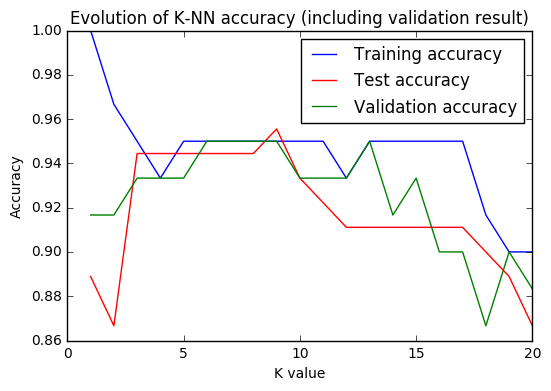

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
{'n_neighbors': 6}


In [12]:
# Printing results
print("Cross validation results:")

paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']

for fold in range(nfold):
    params = paramsFolds[fold]
    mean_score = meanScoreFolds[fold]
    std_score = stdScoreFolds[fold]
    print("For K = %d, validation accuracy is %2.2f (+/-%1.3f)%%" 
          % (params['n_neighbors'], 100*mean_score, 100*std_score / 2))

# Selecting validation error (mean values)
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(rang_K,vect_tr,'b', label='Training accuracy')
plt.plot(rang_K,vect_test,'r', label='Test accuracy')
plt.plot(rang_K,vect_val,'g', label='Validation accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy (including validation result)')
plt.show()
print clf.best_estimator_
print clf.best_params_

Examine the fields ".best\_estimator\_" and ".best\_params\_" of the classifier generated by the CV process:
* ".best\_estimator\_" contains  the final classifier trained with this select value.
* ".best\_params\_" is a dictionary with the selected parameters. In our example, "best\_params\_['n\_neighbors']" would provide the selected value of K.

Save the selected value of K in variable denoted "K_opt" and compute the test error of the final classifier.

In [13]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Assign to K_opt the value of K selected by CV
K_opt = clf.best_params_['n_neighbors']
print("The value optimum of K is %d" %(K_opt))

# Select the final classifier  and compute its test error
KNN_acc_test = clf.best_score_
print("The test accuracy is %2.2f" %(100*KNN_acc_test))

The value optimum of K is 6
The test accuracy is 95.00


Note that you can also compute the test error directly over the classifier object return by the CV process

In [14]:
KNN_acc_test2 = clf.score(X_test, Y_test)
print("The test accuracy is %2.2f" %(100*KNN_acc_test2))

The test accuracy is 94.44


In [15]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(K_opt, 6, 'incorrect result: The value of K_opt is uncorrect')
Test.assertEquals(np.round(KNN_acc_test,4), 0.9444, 'incorrect result: Test error of K-NN after CV process is uncorrect')


1 test passed.
1 test failed. incorrect result: Test error of K-NN after CV process is uncorrect


## ** Advanced work**

 Complete the following code to implement the CV process without using GridSearchCV().

In [11]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import neighbors
from sklearn.model_selection import StratifiedKFold

# Parameters
K_max = 20
rang_K = np.arange(1, K_max+1)
nfold = 10
N_tr, N_dim = X_train.shape

# Create data partitions (check the structure of folds)
skf = StratifiedKFold(n_splits=nfold)

# Create variable (acc_val) to save the validation results
acc_val = np.zeros([nfold, K_max])
for f, (train, val) in enumerate(skf.split(X_train, Y_train)):
    # f is an index with the number of fold
    # train has the training data positions for fold f
    # val has the validation data positions for fold f
    
    # Create training and validation partitions for fold f
    X_tr_f = # <FILL IN>
    Y_tr_f = # <FILL IN>
    X_val_f = # <FILL IN>
    Y_val_f = # <FILL IN>

    # Explore the values of K
    for K, n_neighbors in enumerate(rang_K):
        # Train a K-NN with the training data of this fold data using n_neighbors
        clf = # <FILL IN>
        # Evaluate its accuaracy over the validation data of this fold and save it in acc_val
        acc_val[f, K] = # <FILL IN>

# Compute the average validation error (average over the different folds)
acc_val_med = # <FILL IN>
# Select the optimum value of K as the value which achieves the maximum average validation error
K_opt = # <FILL IN>

# Train the final K-NN classfier (with K_opt) and obtain its test error
clf = # <FILL IN>
acc_test = # <FILL IN>

print "K_NN with optimum K = " + np.array_str(K_opt) + \
    ". Test error = " + np.array_str(acc_test)

SyntaxError: invalid syntax (<ipython-input-11-91e87aaf5dde>, line 25)

In [12]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(K_opt, 6, 'incorrect result: The value of K_opt is uncorrect')
Test.assertEquals(np.round(KNN_acc_test,4), 0.9444, 'incorrect result: Test error of K-NN after CV process is uncorrect')


1 test failed. incorrect result: The value of K_opt is uncorrect
1 test failed. incorrect result: Test error of K-NN after CV process is uncorrect


#### ** 1.3: Plotting K-NN classification boundary**

To finish this section, we are going to plot classification boundary of the K-NN classifier. For this purpose, next cell contains the plot_boundary function used in the first lab session. Use this function to plot the classification boundary of the cross validated K-NN classifier over training and test data.

In [16]:
# Plot the decision boundary
import matplotlib.pyplot as plt

def plot_boundary(clf, X, Y, plt):
    """Plot the classification regions for a given classifier.

    Args:
        clf: scikit-learn classifier object.
        X (numpy dnarray): training or test data to be plotted (number data x number dimensions). Only frist two 
                            dimensions are ploted
        Y (numpy dnarray): labels of the training or test data to be plotted (number data x 1).
        plt: graphic object where you wish to plot                                             
   
    """

    plot_colors = "brymc"
    plot_step = 0.02
    n_classes = np.unique(Y).shape[0]
    # Plot the decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    plt.axis("tight")

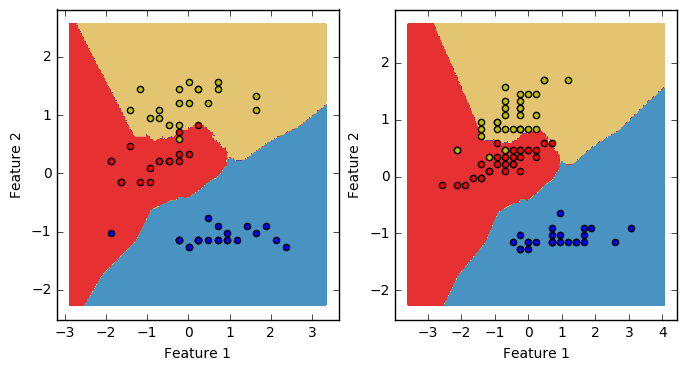

In [17]:
plt.figure(figsize=(8, 4))
# Plot classification boundary over training data
plt.subplot(1,2,1)
plot_boundary(clf, X_train, Y_train, plt)

# Plot classification boundary over test data
plt.subplot(1,2,2)
plot_boundary(clf, X_test, Y_test, plt)

plt.show()

### ** Part 2: SVM**

SVM is one of the most well-known classifiers due to its good generalization properties in many different applications. Besides, by means of the kernel trick, its linear formulation can easily extended to a non linear fashion. 

Here, we will test its performance when different kernel functions are used. For this purpose, we can use the [SCV( )](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) method, which let you select the kernel function to be used, and the method GridSearchCV( ) to adjust the different free parameters (C and kernel parameter). 

Complete the following cells, when it is required, to train in each case a linear SVM (defining kernel='linear' in the method SCV( )), an SVM with gaussian kernel (kernel='rbf') and an SVM with polynomial kernel (kernel='poly'). 

For each method, adjust the corresponding free parameters with a 10 fold CV process (the ranges to explore are defined at the beginning of each cell). Return the values of selected parameters and the accuracy of the final SVM.

#### ** 2.1: Linear SVM**

In [34]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import svm
from sklearn.model_selection import GridSearchCV
rang_C = np.logspace(-3, 3, 10)
tuned_parameters = [{'C': rang_C}]

nfold = 10

# Train a liner SVM and adjust by CV the parameter C
clf_base = svm.SVC(kernel='linear')
lin_svc  = GridSearchCV(clf_base, tuned_parameters, cv=nfold)
lin_svc.fit(X_train, Y_train)

# Save the value of C selected and compute the final accuracy
C_opt = lin_svc.best_params_['C']
acc_lin_svc = lin_svc.best_score_ 

print "The C value selected is " + str(C_opt)
print("The test accuracy of the linear SVM is %2.2f" %(100*acc_lin_svc))

The C value selected is 0.464158883361
The test accuracy of the linear SVM is 93.33


In [35]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(C_opt,2), 0.46, 'incorrect result: The value of C_opt is uncorrect')
Test.assertEquals(np.round(acc_lin_svc,4), 0.9556, 'incorrect result: Test accuracy of the linear SVM after CV process is uncorrect')


1 test passed.
1 test failed. incorrect result: Test accuracy of the linear SVM after CV process is uncorrect


#### ** 2.2: SVM with gaussian kernel**

In [24]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
n_dim=X_train.shape[1]
rang_g=np.array([0.125, 0.25, 0.5, 1, 2, 4, 8])/(np.sqrt(n_dim))
tuned_parameters = [{'C': rang_C, 'gamma': rang_g}]

# Train an SVM with gaussian kernel and adjust by CV the parameter C
clf_base = svm.SVC(kernel='rbf')
rbf_svc  = GridSearchCV(clf_base, tuned_parameters, cv=nfold)
rbf_svc.fit(X_train, Y_train)
# Save the values of C and gamma selected and compute the final accuracy
C_opt = rbf_svc.best_params_['C']
g_opt = rbf_svc.best_params_['gamma']


print "The C value selected is " + str(C_opt)
print "The gamma value selected is " + str(g_opt)
acc_rbf_svc = rbf_svc.score(X_test, Y_test)
print("The test accuracy of the RBF SVM is %2.2f" %(100*acc_rbf_svc))

The C value selected is 2.15443469003
The gamma value selected is 0.0883883476483
The test accuracy of the RBF SVM is 94.44


In [25]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(C_opt, 2), 2.15, 'incorrect result: The value of C_opt is uncorrect')
Test.assertEquals(np.round(g_opt, 2), 0.09, 'incorrect result: The value of g_opt is uncorrect')
Test.assertEquals(np.round(acc_rbf_svc, 4), 0.9444, 'incorrect result: Test accuracy of the rbf SVM after CV process is uncorrect')


1 test passed.
1 test passed.
1 test passed.


#### ** 2.3. SVM with polynomial kernel**

In [28]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

rang_d=np.arange(1,5)
tuned_parameters = [{'C': rang_C, 'degree': rang_d}]

# Train an SVM with polynomial kernel and adjust by CV the parameter C
clf_base =  svm.SVC(kernel='poly')
poly_svc  = GridSearchCV(clf_base, tuned_parameters, cv=nfold) 
poly_svc.fit(X_train, Y_train)

# Save the values of C and degree selected and compute the final accuracy
C_opt = poly_svc.best_params_['C'] 
d_opt = poly_svc.best_params_['degree'] 


print "The C value selected is " + str(C_opt)
print "The degree value selected is " + str(d_opt)
acc_poly_svc = poly_svc.score(X_test, Y_test)
print("The test accuracy of the polynomial SVM is %2.2f" %(100*acc_poly_svc))

The C value selected is 10.0
The degree value selected is 3
The test accuracy of the polynomial SVM is 91.11


In [29]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(C_opt, 2), 10 , 'incorrect result: The value of C_opt is uncorrect')
Test.assertEquals(np.round(d_opt, 2), 3, 'incorrect result: The value of d_opt is uncorrect')
Test.assertEquals(np.round(acc_poly_svc, 4), 0.9111, 'incorrect result: Test accuracy of the polynomial SVM after CV process is uncorrect')


1 test passed.
1 test passed.
1 test passed.


#### ** 2.4. Plot the classification boundaries and support vectors**

The SVM decision function depends on some subset of the training data, called the support vectors. In this section we are going to compare the boundaries provided by the different kernel functions and study which training points are support vectors.

As in previous sections, you can use the plot_boundary( ) function to display the decision regions. To obtain the support vectors, you can access to the parameters "support\_vectors\_" of the svm classifier object. Add the necessary code to include them in the figure.


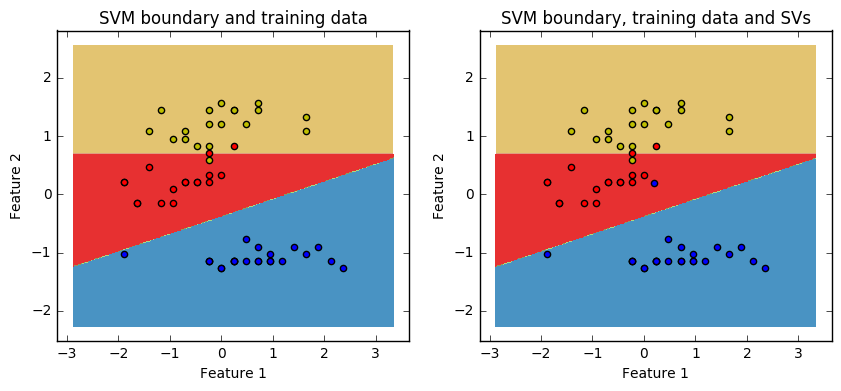

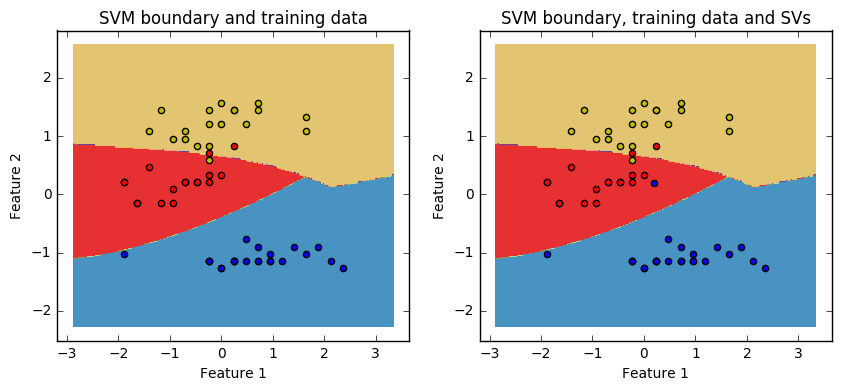

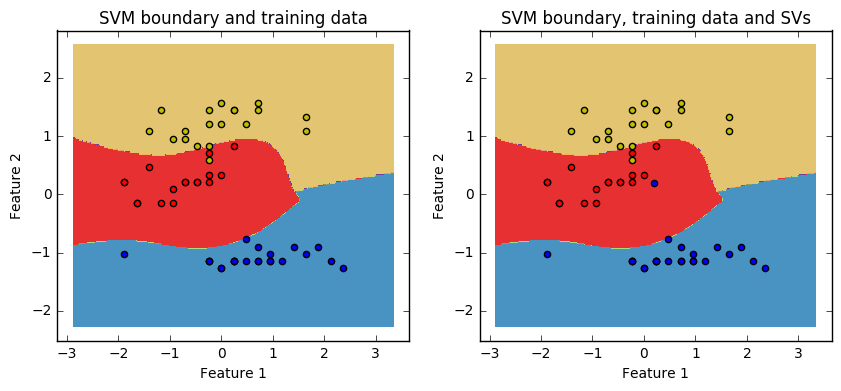

In [37]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

plt.figure(1,figsize=(10, 4))

# Linear SVM 
plt.subplot(1,2,1)
plot_boundary(lin_svc , X_train, Y_train, plt)
plt.title ('SVM boundary and training data')
plt.subplot(1,2,2)
plot_boundary(lin_svc , X_train, Y_train, plt)
SVs=clf_base 
plt.scatter(X[0], X[1], cmap=plt.cm.Paired)
plt.title ('SVM boundary, training data and SVs')


plt.figure(2,figsize=(10, 4))
# RBF SVM 
plt.subplot(1,2,1)
plot_boundary(rbf_svc , X_train, Y_train, plt)
plt.title ('SVM boundary and training data')
plt.subplot(1,2,2)
plot_boundary(rbf_svc , X_train, Y_train, plt)
SVs=clf_base 
plt.scatter(X[0], X[1], cmap=plt.cm.Paired)
plt.title ('SVM boundary, training data and SVs')


plt.figure(3,figsize=(10, 4))
# Polynomial SVM 
plt.subplot(1,2,1)
plot_boundary(poly_svc , X_train, Y_train, plt)
plt.title ('SVM boundary and training data')
plt.subplot(1,2,2)
plot_boundary(poly_svc , X_train, Y_train, plt)
SVs=clf_base 
plt.scatter(X[0], X[1], cmap=plt.cm.Paired)
plt.title ('SVM boundary, training data and SVs')


plt.show()


Note that the boundaries of linear and RBF SVMs and,  even, their SVs are quite similar. Examine the value selected for the parameter gamma of the gaussian kernel and try to explain because RBF SVM boundary tends to be linear.

### ** Part 3: other linear classifiers **

Include the necessary code to train and test a classifier based in:
1. A logistic regression model: in thiscase adjust the C parameter by CV
2. Linear Discrimation Analysis 

In [38]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Logistic regression
from sklearn.linear_model import LogisticRegression

rang_C = np.logspace(-3, 3, 10)
tuned_parameters = [{'C': rang_C}]
nfold = 10

# Train a LR model and adjust by CV the parameter C
clf_LR  = GridSearchCV(LogisticRegression(),
                   tuned_parameters, cv=nfold)
clf_LR.fit(X_train, Y_train)
acc_test_LR=clf_LR.score(X_test, Y_test) 

# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf_LDA = LDA()
clf_LDA.fit(X_train, Y_train)
acc_test_LDA=clf_LDA.score(X_test, Y_test) 

print("The test accuracy of LR is %2.2f" %(100*acc_test_LR))
print("The test accuracy of LDA is %2.2f" %(100*acc_test_LDA))

The test accuracy of LR is 87.78
The test accuracy of LDA is 96.67


In [39]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(100*acc_test_LR, 2), 87.78 , 'incorrect result: The value of acc_test_LR is uncorrect')
Test.assertEquals(np.round(100*acc_test_LDA, 2), 96.67, 'incorrect result: The value of acc_test_LDA is uncorrect')

1 test passed.
1 test passed.


Include the necessary code to plot their classification boundaries

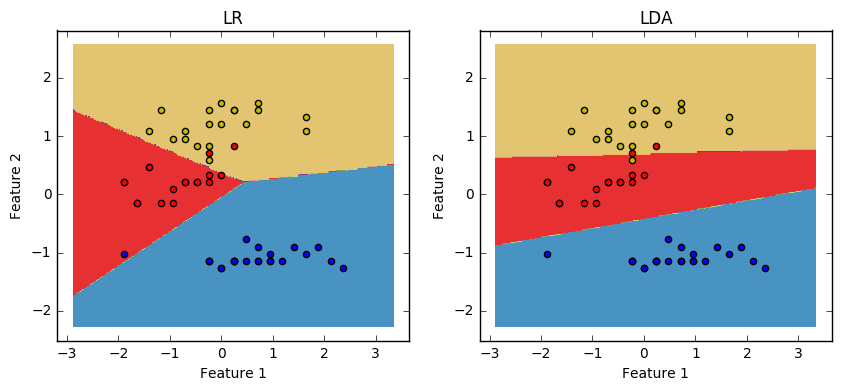

In [33]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

plt.figure(1,figsize=(10, 4))

# LR
plt.subplot(1,2,1)
plot_boundary(clf_LR , X_train, Y_train, plt)
plt.title ('LR')
# LDA
plt.subplot(1,2,2)
plot_boundary(clf_LDA , X_train, Y_train, plt)
plt.title ('LDA')

